<a href="https://colab.research.google.com/github/ananstr/brushup_coding/blob/main/Coding_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## H0: There is a correlation between a country's GDP per capita and its CO2 emissions per capita.

#### To look at the correlation between a country's GDP per capita and its CO2 emissions per capita, we downloaded the most recent available data from the World Bank (2020):

- GDP per capita (current US$): This indicator measures the average income per person in a country.
- CO2 emissions (metric tons per capita): This indicator measures the amount of carbon dioxide emitted per person in a country.

#### Steps for Analysis:

- Data Acquisition: Get GDP per capita and CO2 emissions data for from the World Bank database.
- Data Assessment and Preparation: Inspect the imported data, clean it up to ensure consistency, handle missing values, and address outliers.
- Visualization of Data: Create a scatter plot to visually represent the relationship.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Acquisition

In [2]:
# Get the relative file path
import os

current_directory = os.getcwd()

# Define the file name or sub-directory where your file is located
file_name = 'GDP_CO2_2020.csv'

# Get the relative path
relative_path = os.path.join(current_directory, file_name)

print("Relative Path:", relative_path)

Relative Path: /Users/newmac/Downloads/ananstr-brushup_coding-4015030/GDP_CO2_2020.csv


In [3]:
#Import data
df = pd.read_csv("GDP_CO2_2020.csv")

### Data Assessment and Preparation

In [4]:
# Looking for number of rows and columns
print(df.shape)

(651, 5)


In [5]:
# Check out column names
df.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2020 [YR2020]'],
      dtype='object')

In [6]:
#Replace ".." (WB's for NaN) with "NaN"
df = df.replace("..", np.nan)

#Show how many missing variable there are per row
missing_values_per_row = df.isnull().sum(axis=1)
print(missing_values_per_row)

0      0
1      0
2      0
3      0
4      0
      ..
646    1
647    1
648    0
649    0
650    0
Length: 651, dtype: int64


In [10]:
# Pivot the dataframe to resolve the problem of all the indicators being listed one after another in rows

df['2020 [YR2020]'] = df['2020 [YR2020]'].astype('float')
df_pivoted = df.pivot_table(index='Country Name', columns='Series Name', values='2020 [YR2020]')
df_pivoted.sample(5)

Series Name,CO2 emissions (metric tons per capita),GDP per capita (current US$),"Population, total"
Country Name,,,
"Bahamas, The",6.042251,24499.164762,406471.0
American Samoa,NaN,15609.777220,46189.0
Turkmenistan,10.184086,7330.366288,6250438.0
St. Kitts and Nevis,4.848663,18553.423916,47642.0
Bulgaria,4.923280,10148.342395,6934015.0


In [11]:
# Rename column names for convenience

rename_dict = {
    'CO2 emissions (metric tons per capita)' : 'CO2',
    'GDP per capita (current US$)' : 'GDP',
    'Population, total' : 'pop'

}

df_pivoted.rename(columns=rename_dict, inplace=True)
df_pivoted

Series Name,CO2,GDP,pop
Country Name,,,
Afghanistan,0.223479,512.055098,38972230.0
Albania,1.544550,5343.037704,2837849.0
Algeria,3.718223,3794.409524,43451666.0
American Samoa,NaN,15609.777220,46189.0
Andorra,5.777148,37207.221999,77700.0
...,...,...,...
Virgin Islands (U.S.),NaN,39411.045254,106290.0
West Bank and Gaza,NaN,3233.568638,4803269.0
"Yemen, Rep.",0.308515,626.309169,32284046.0


### Visualization of Data

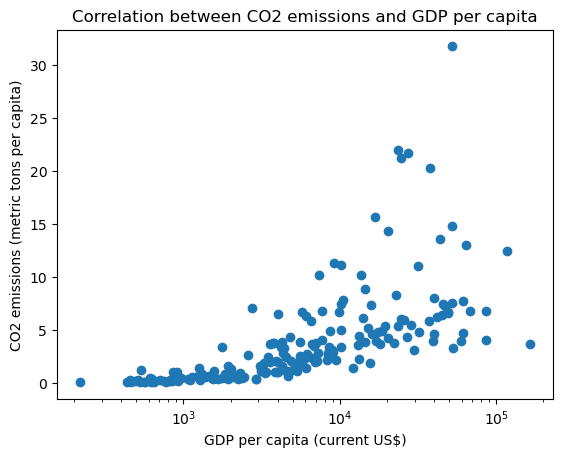

In [56]:
# Create a scatter plot using Pyplot, with GDP on the x-axis and CO2 on the y-axis. Set the x-axis to a logarithmic scale to make it easier to visualize the exponential relationship between x and y.

y = df_pivoted['CO2']
x = df_pivoted['GDP']
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlabel('GDP per capita (current US$)')
plt.xscale("log")
plt.title('Correlation between CO2 emissions and GDP per capita')
plt.scatter(x, y)

### Conclusion

From the scatter plot above we can conclude that the initial hypothesis was true: as GDP per capita increases, CO2 emissions per capita also tends to rise. This might be due to the fact that countries with higher GDP have more industrial activity contributing to higher CO2 emissions.

However, we can see that there is also a tendency for the CO2 emissions to slightly go down as a country's economic development increases (measured by GDP per capita). This could be attributed to the fact that as the GDP increases, countries may pivot from industrialization to investing in cleaner technologies, improving energy efficiency, and implementing stricter environmental regulations, leading to a decline in emissions.

### Lessons learned:
- Initially we wanted to look at the data by region (EU, North America, Africa, Arab States, etc.). However, most of the data for the aggregates of countries was missing. For this kind of analysis one would have to manually select the sets of countries and then calculate the aggregate values using Python.
- WB data always has to be cleaned (for ex. to remove ".." for NaN) and manipulated (for example to convert rows with multiple indicators into separate columns).
- When you download WB data for the entire world, it may include the totals for regions or the entire world, so it's best to drop this data from analysis.
- Certain WB data is not updated regularly. Indicators like Population and GDP are relatively up-to-date, but for CO2 emissions, the most recent data is from 2020. Therefore to assess the relationship between GDP and CO2 emissions, we had to pull the data for the year 2020 or older.